In [1]:
import numpy as np
from scipy.optimize import minimize
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
"""
Defines the boundary curve on R^3 for Plateau's problem
"""
def function(x,y):
    #Known minimal surfaces:
    
    #return (2*x+y)
    return np.log(np.cos(3*(y-0.5))/np.cos(3*(x-0.5))) #Schrek surface
    #return math.sqrt((math.cosh (2*x-1))**2-(2*y-1)**2) #Catenoid
    #return np.arctan(1/(np.tan(np.pi*x/2+np.pi/4)*np.tan(np.pi*y/2+np.pi/4))) #D-Schwarz surface
    #return math.acos(math.sin(math.pi*x)-math.sin(math.pi*y)) #P-Schwarz surface
    
    #Unknown minimal surfaces:
    
    #return np.exp(-((x-0.5)**2+(y-0.5)**2))
    #return (np.cos(2*x*math.pi)+1)*(np.cos(2*y*math.pi)+1)/2
    #return abs(x+y-1) #Schwarz D o P
    #return ((2*x-1)**2)-((2*y-1)**2) #Saddle

In [3]:
"""
Sets the boundary values of an nxn grid on [0,1]x[0,1] using the function defined previously
"""
def boundary(x):
    n=int(math.sqrt(len(x)))
    a=np.linspace(0,1,num=int(n))
    for i in range(n):
        x[i]=function(a[i],0) #Boundary along y=0
        x[i*n]=function(0,a[i]) #Boundary along x=0
        x[n**2-n+i]=function(a[i],1) #Boundary along y=1
        x[(i+1)*n-1]=function(1,a[i]) #Boundary along x=1
    return x

In [4]:
"""
Calculates the area of the surface defined by x via finite element method
"""
def area(x):
    x=boundary(x)
    n=int(math.sqrt(len(x)))
    inf=0
    sup=0
    ran=(n-1)**2
    for i in range(ran):
        j=math.floor(i/(n-1))
        inf+=math.sqrt(1/((n-1)**2)+(x[i+j]-x[i+j+1])**2+(x[i+j]-x[int(i+j+n)])**2)
        sup+=math.sqrt(1/((n-1)**2)+(x[i+j+1]-x[int(i+j+1+n)])**2+(x[int(i+j+1+n)]-x[int(i+j+n)])**2)
    area=inf+sup
    return area/(2*(n-1))

In [5]:
"""
Optimizes the values of x to find the minimal surface with the given boundary.
"""
def minisurf(n):
    z=boundary(np.zeros(n**2))
    suma=np.sum(z)
    z+=suma/(4*n-4)
    
    sol=minimize(area,z,method = 'BFGS')
    
    matrix=boundary(sol.x)
    sol
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)

    x,y = np.meshgrid(x,y)

    fig = plt.figure(figsize = (12,10))
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(x.flatten(), y.flatten(), matrix, linewidth=0.2, antialiased=True, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    return sol

##

# Solution to the minimal surface problem via finite element method:

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.835625805072338
        x: [ 0.000e+00 -1.012e+00 ... -1.012e+00  0.000e+00]
      nit: 88
      jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
 hess_inv: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
            ...
            [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]]
     nfev: 56340
     njev: 90

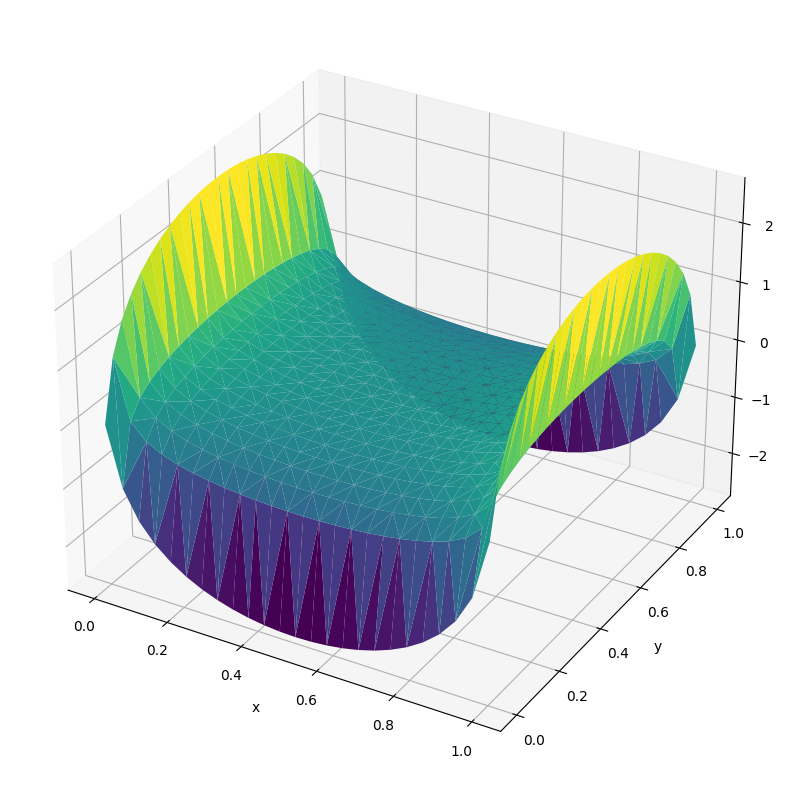

In [6]:
"""
fun: value of the minimal surface area found
x: vector that spans the minimal surface
nit: number of iterations required
"""
solution=minisurf(25)
solution

##

## Theoretical minimal surface for the given boundary:

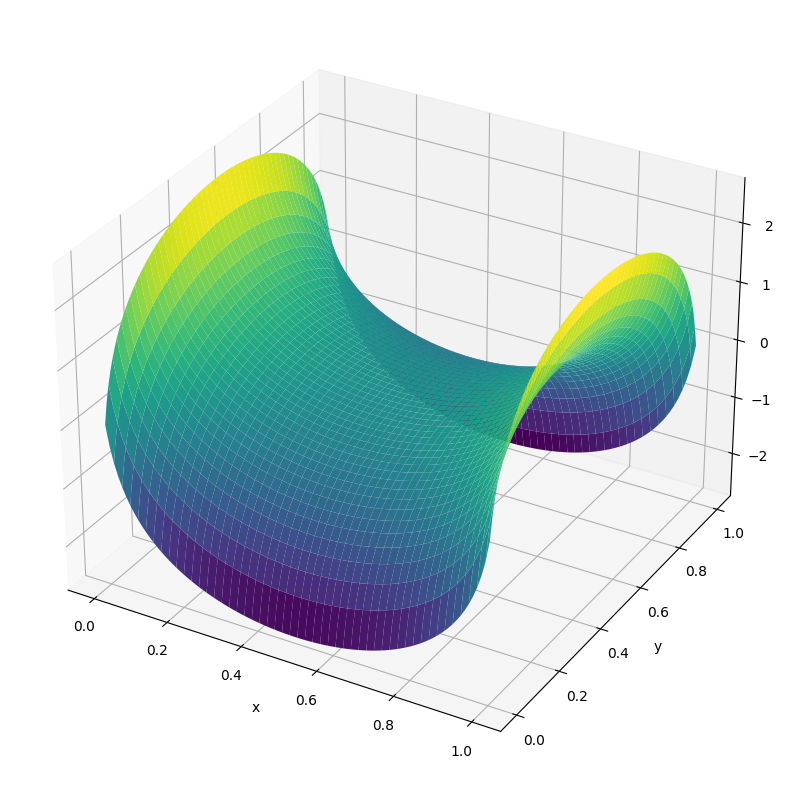

In [7]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

z_mesh = np.vectorize(function)(x_mesh, y_mesh)

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

#

## Graph of the boundary:

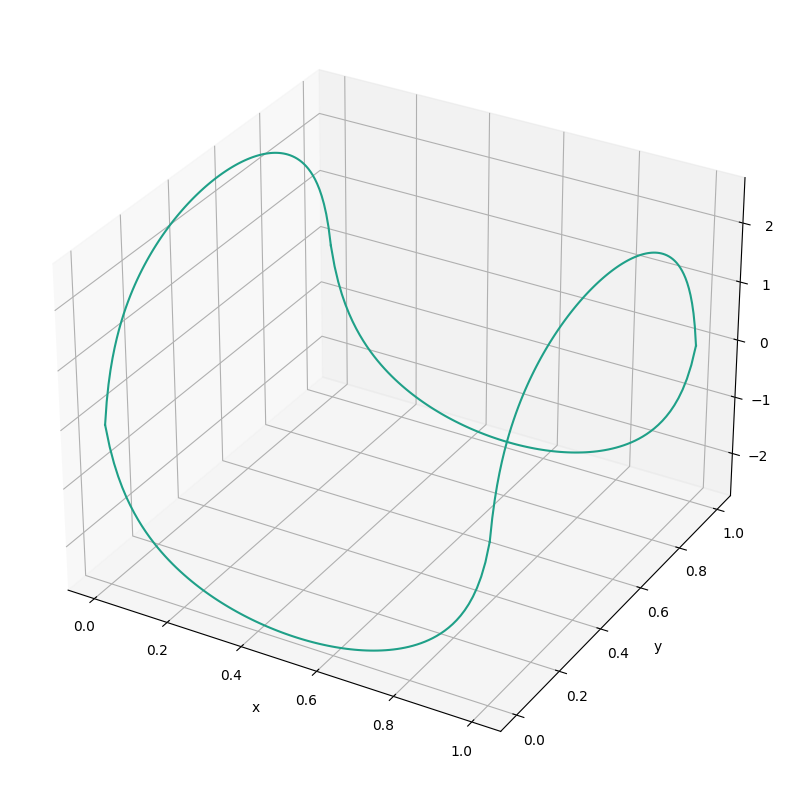

In [8]:
x_line = np.linspace(0, 1, 100)
y_line = np.linspace(0, 1, 100)

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(np.zeros_like(y_line), y_line, function(0, y_line),color='#1fa088')

ax.plot(np.ones_like(y_line), y_line, function(1, y_line),color='#1fa088')

ax.plot(x_line, np.zeros_like(x_line), function(x_line, 0),color='#1fa088')

ax.plot(x_line, np.ones_like(x_line), function(x_line, 1),color='#1fa088')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()